Data preprocessing and analysis 

In [2]:
import pandas as pd
data = pd.read_csv('onlr.csv', encoding='ISO-8859-1')

In [3]:
# Step 1: Understanding the Dataset and Data Preprocessing


# 1.3 Display the first few rows of the dataset to understand its structure
print("Dataset structure:")
print(data.head())

# 1.4 Check for any missing values and handle them if necessary
print("\nMissing values:")
print(data.isnull().sum())


Dataset structure:
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

        InvoiceDate  UnitPrice  CustomerID         Country  
0  01-12-2010 08:26       2.55     17850.0  United Kingdom  
1  01-12-2010 08:26       3.39     17850.0  United Kingdom  
2  01-12-2010 08:26       2.75     17850.0  United Kingdom  
3  01-12-2010 08:26       3.39     17850.0  United Kingdom  
4  01-12-2010 08:26       3.39     17850.0  United Kingdom  

Missing values:
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country    

In [5]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [6]:
data.dropna(subset=['Description'], inplace=True)

In [7]:
print("\nMissing values:")
print(data.isnull().sum())


Missing values:
InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     133626
Country             0
dtype: int64


In [8]:
#Transform the dataset into transactional format
transactions = data.groupby('InvoiceNo')['Description'].apply(list).values.tolist()

In [9]:
# 1.8 Display the first few transactions to verify the transformation
print("\nTransaction format:")
print(transactions[:5])


Transaction format:
[['WHITE HANGING HEART T-LIGHT HOLDER', 'WHITE METAL LANTERN', 'CREAM CUPID HEARTS COAT HANGER', 'KNITTED UNION FLAG HOT WATER BOTTLE', 'RED WOOLLY HOTTIE WHITE HEART.', 'SET 7 BABUSHKA NESTING BOXES', 'GLASS STAR FROSTED T-LIGHT HOLDER'], ['HAND WARMER UNION JACK', 'HAND WARMER RED POLKA DOT'], ['ASSORTED COLOUR BIRD ORNAMENT', "POPPY'S PLAYHOUSE BEDROOM ", "POPPY'S PLAYHOUSE KITCHEN", 'FELTCRAFT PRINCESS CHARLOTTE DOLL', 'IVORY KNITTED MUG COSY ', 'BOX OF 6 ASSORTED COLOUR TEASPOONS', 'BOX OF VINTAGE JIGSAW BLOCKS ', 'BOX OF VINTAGE ALPHABET BLOCKS', 'HOME BUILDING BLOCK WORD', 'LOVE BUILDING BLOCK WORD', 'RECIPE BOX WITH METAL HEART', 'DOORMAT NEW ENGLAND'], ['JAM MAKING SET WITH JARS', 'RED COAT RACK PARIS FASHION', 'YELLOW COAT RACK PARIS FASHION', 'BLUE COAT RACK PARIS FASHION'], ['BATH BUILDING BLOCK WORD']]


Exploratory Data Analysis

c:\Users\uk029\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\uk029\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\uk029\AppData\Local\Temp\ipykernel_26948\3535570460.py:46: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data.resample('M').size().plot(ax=axes[2, 0], color='green')


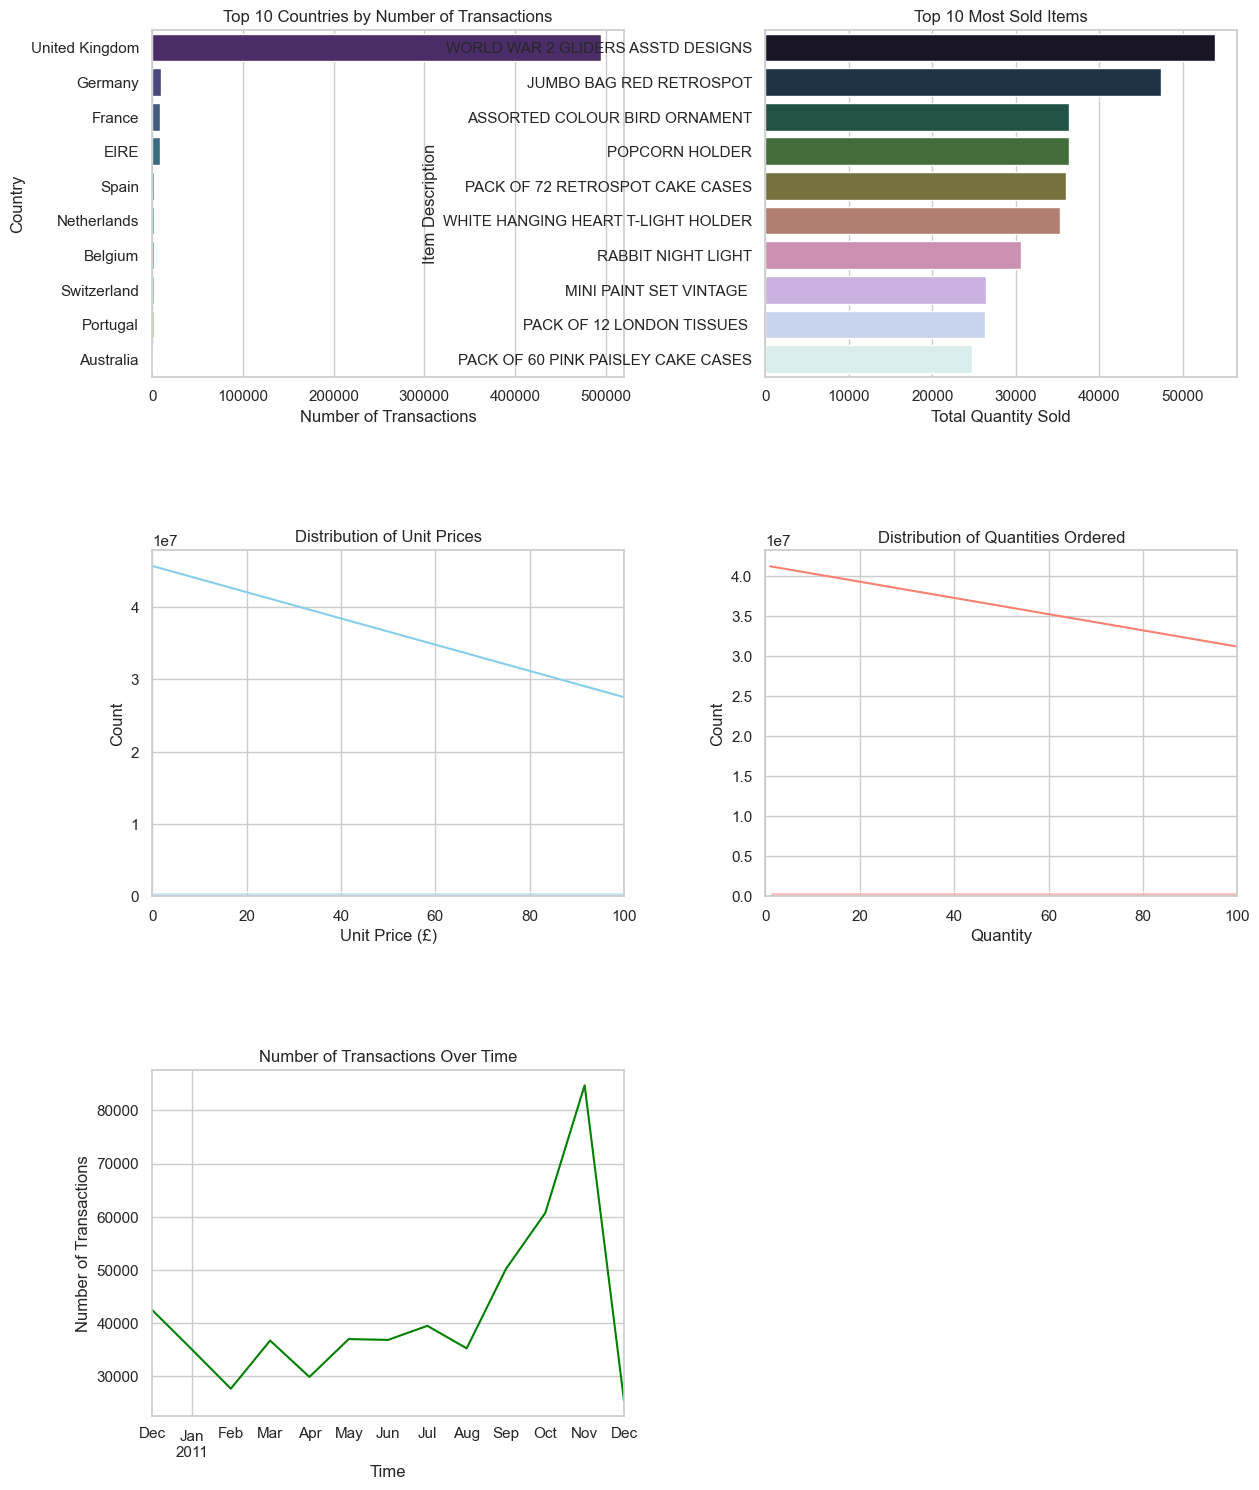

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
# Try loading the dataset with ISO-8859-1 encoding
data = pd.read_csv('onlr.csv', encoding='ISO-8859-1')
data.head()
# Generate a summary of the dataset to identify key aspects
data.describe(include='all')

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create a figure to hold the visualizations
fig, axes = plt.subplots(3, 2, figsize=(14, 18))
fig.subplots_adjust(hspace=0.5, wspace=0.3)

# Plot 1: Distribution of transactions by country
country_counts = data['Country'].value_counts().head(10)
sns.barplot(y=country_counts.index, x=country_counts.values, ax=axes[0, 0], palette='viridis')
axes[0, 0].set_title('Top 10 Countries by Number of Transactions')
axes[0, 0].set_xlabel('Number of Transactions')
axes[0, 0].set_ylabel('Country')


# Plot 2: Top 10 most sold items
top_items = data.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)
sns.barplot(y=top_items.index, x=top_items.values, ax=axes[0, 1], palette='cubehelix')
axes[0, 1].set_title('Top 10 Most Sold Items')
axes[0, 1].set_xlabel('Total Quantity Sold')
axes[0, 1].set_ylabel('Item Description')

# Plot 3: Price distribution of products
sns.histplot(data['UnitPrice'], bins=30, ax=axes[1, 0], color='skyblue', kde=True)
axes[1, 0].set_title('Distribution of Unit Prices')
axes[1, 0].set_xlabel('Unit Price (£)')
axes[1, 0].set_xlim(0, 100)  # Limit x-axis to focus on typical prices

# Plot 4: Quantity distribution
sns.histplot(data[data['Quantity'] > 0]['Quantity'], bins=30, ax=axes[1, 1], color='salmon', kde=True)
axes[1, 1].set_title('Distribution of Quantities Ordered')
axes[1, 1].set_xlabel('Quantity')
axes[1, 1].set_xlim(0, 100)  # Focus on typical order sizes

# Plot 5: Number of transactions over time
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'], format='%d-%m-%Y %H:%M')
data.set_index('InvoiceDate', inplace=True)
data.resample('M').size().plot(ax=axes[2, 0], color='green')
axes[2, 0].set_title('Number of Transactions Over Time')
axes[2, 0].set_xlabel('Time')
axes[2, 0].set_ylabel('Number of Transactions')

# Remove empty subplot
fig.delaxes(axes[2, 1])

plt.show()


    PRIVACY TECHNIQUES USED

Implementation of K Anonymity

In [24]:
#step 2- now implement k-anonymity

def anonymize_data(data,k) :
  grouped_data=data.groupby(['InvoiceNo'])
  ano_data=pd.DataFrame(columns=data.columns)
  for group_name, group_data in grouped_data:
    if len(group_data)<k:
      ano_data = pd.concat([ano_data, group_data])
    else:
      ano_data = pd.concat([ano_data, group_data.sample(k-1)])  # Select k-1 random records from the group
  return ano_data
# 2.4 Apply K-Anonymity to the dataset
k = 5  # Choose an appropriate value for k
ano_data = anonymize_data(data, k)
print("Anonymized dataset:")
print(ano_data.head())

C:\Users\uk029\AppData\Local\Temp\ipykernel_26948\2842110370.py:10: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  ano_data = pd.concat([ano_data, group_data.sample(k-1)])  # Select k-1 random records from the group
C:\Users\uk029\AppData\Local\Temp\ipykernel_26948\2842110370.py:10: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  ano_data = pd.concat([ano_data, group_data.sample(k-1)])  # Select k-1 random records from the group


Anonymized dataset:
                    InvoiceNo StockCode                          Description  \
2010-12-01 08:26:00    536365    84406B       CREAM CUPID HEARTS COAT HANGER   
2010-12-01 08:26:00    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE   
2010-12-01 08:26:00    536365     71053                  WHITE METAL LANTERN   
2010-12-01 08:26:00    536365     22752         SET 7 BABUSHKA NESTING BOXES   
2010-12-01 08:28:00    536366     22633               HAND WARMER UNION JACK   

                    Quantity  UnitPrice  CustomerID         Country  
2010-12-01 08:26:00        8       2.75     17850.0  United Kingdom  
2010-12-01 08:26:00        6       3.39     17850.0  United Kingdom  
2010-12-01 08:26:00        6       3.39     17850.0  United Kingdom  
2010-12-01 08:26:00        2       7.65     17850.0  United Kingdom  
2010-12-01 08:28:00        6       1.85     17850.0  United Kingdom  


In [33]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country
InvoiceDate,,,,,,,
2010-12-01 08:26:00,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,<10,17850.0,United Kingdom
2010-12-01 08:26:00,536365,71053,WHITE METAL LANTERN,6,<10,17850.0,United Kingdom
2010-12-01 08:26:00,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,<10,17850.0,United Kingdom
2010-12-01 08:26:00,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,<10,17850.0,United Kingdom
2010-12-01 08:26:00,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,<10,17850.0,United Kingdom


using suppression and generalization in k-anonymity

In [10]:
import pandas as pd

def generalize_dates(date):
    # Generalizes full dates to year-month format
    return pd.to_datetime(date).strftime('%Y-%m')

def generalize_price(price):
    # Generalizes price into ranges
    if price < 10:
        return "<10"
    elif price < 20:
        return "10-20"
    else:
        return "20+"

def anonymize_data(data, k):
    # Apply generalization to specific columns
    # data['InvoiceDate'] = data['InvoiceDate'].apply(generalize_dates)
    data['UnitPrice'] = data['UnitPrice'].apply(generalize_price)

    # Group data and calculate group sizes
    group_sizes = data.groupby('InvoiceNo').size()
    valid_groups = group_sizes[group_sizes >= k].index
    valid_data = data[data['InvoiceNo'].isin(valid_groups)]

    # Apply sampling within groups
    anonymized_data = valid_data.groupby('InvoiceNo').apply(lambda x: x.sample(n=k-1)).reset_index(drop=True)
    # Suppressing CustomerID in the anonymized data
    anonymized_data['CustomerID'] = 'Suppressed'
    anonymized_data['InvoiceNo'] = 'Suppressed2'
    

    return anonymized_data



# Apply K-Anonymity to the dataset
k = 5  
ano_data = anonymize_data(data, k)

print("Anonymized dataset:")
print(ano_data.head())


Anonymized dataset:
     InvoiceNo StockCode                         Description  Quantity  \
0  Suppressed2     71053                 WHITE METAL LANTERN         6   
1  Suppressed2    84406B      CREAM CUPID HEARTS COAT HANGER         8   
2  Suppressed2     22752        SET 7 BABUSHKA NESTING BOXES         2   
3  Suppressed2     21730   GLASS STAR FROSTED T-LIGHT HOLDER         6   
4  Suppressed2     84969  BOX OF 6 ASSORTED COLOUR TEASPOONS         6   

        InvoiceDate UnitPrice  CustomerID         Country  
0  01-12-2010 08:26       <10  Suppressed  United Kingdom  
1  01-12-2010 08:26       <10  Suppressed  United Kingdom  
2  01-12-2010 08:26       <10  Suppressed  United Kingdom  
3  01-12-2010 08:26       <10  Suppressed  United Kingdom  
4  01-12-2010 08:34       <10  Suppressed  United Kingdom  


C:\Users\uk029\AppData\Local\Temp\ipykernel_21460\1317793021.py:27: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  anonymized_data = valid_data.groupby('InvoiceNo').apply(lambda x: x.sample(n=k-1)).reset_index(drop=True)


IMPLEMENTATION OF DIFFRENTIAL PRIVACY

In [11]:
# Step 3: Incorporating Differential Privacy

# 3.1 Import necessary libraries
import pandas as pd
import numpy as np



# 3.3 Define a function to add Laplace noise to the query results
def add_laplace_noise(query_result, epsilon):
    sensitivity = 1  # Sensitivity of the query result
    scale = sensitivity / epsilon
    noise = np.random.laplace(loc=0, scale=scale, size=query_result.shape)
    return query_result + noise

# 3.4 Define a function to implement the Apriori Algorithm with Differential Privacy
def apriori_with_differential_privacy(data, min_support, epsilon):
    # Perform queries on the dataset and add Laplace noise to the query results
    # Example: Query for frequent itemsets
    # Here, we simulate the query result using random numbers
    query_result = np.random.rand(10)  # Placeholder for query result (replace this with actual query)

    # Add Laplace noise to the query results
    noisy_query_result = add_laplace_noise(query_result, epsilon)

    return noisy_query_result


# Anonymize the CustomerID by mapping each unique ID to a new integer
unique_ids = data['CustomerID'].unique()
id_map = {id_: i for i, id_ in enumerate(unique_ids, start=1)}
data['AnonCustomerID'] = data['CustomerID'].map(id_map)

# Display the updated data to confirm anonymization
data[['CustomerID', 'AnonCustomerID']].head()
# Drop the CustomerID and AnonCustomerID columns from the dataset
data_dropped_ids = data.drop(columns=['CustomerID'])

# Display the updated data to confirm the columns have been removed
data_dropped_ids.head()

## suppressing invoice no.
unique_ids = data['InvoiceNo'].unique()
id_map = {id_: i for i, id_ in enumerate(unique_ids, start=1)}
data['AnonInvoice'] = data['InvoiceNo'].map(id_map)

# Display the updated data to confirm anonymization
data[['InvoiceNo', 'AnonInvoice']].head()
# Drop the CustomerID and AnonCustomerID columns from the dataset
data_dropped_ids = data.drop(columns=['InvoiceNo'])

# Display the updated data to confirm the columns have been removed
data_dropped_ids.head()


# 3.5 Apply the Apriori Algorithm with Differential Privacy to the dataset
min_support = 0.1  # Minimum support threshold for frequent itemsets
epsilon = 1.0  # Privacy budget
noisy_query_result = apriori_with_differential_privacy(data, min_support, epsilon)

# 3.6 Display the noisy query result
print("Noisy query result:")
print(noisy_query_result)


Noisy query result:
[ 0.45185557 -0.24752641  0.54304257 -0.58337438 -1.84484857  0.78759757
  1.11728712  0.85354415  3.89006637  0.1811001 ]


In [12]:
data.drop(columns=['CustomerID'], inplace=True)
data.drop(columns=['InvoiceNo'], inplace=True)
data.head()


,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,AnonCustomerID,AnonInvoice
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,<10,United Kingdom,1,1
1,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,<10,United Kingdom,1,1
2,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,<10,United Kingdom,1,1
3,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,<10,United Kingdom,1,1
4,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,<10,United Kingdom,1,1


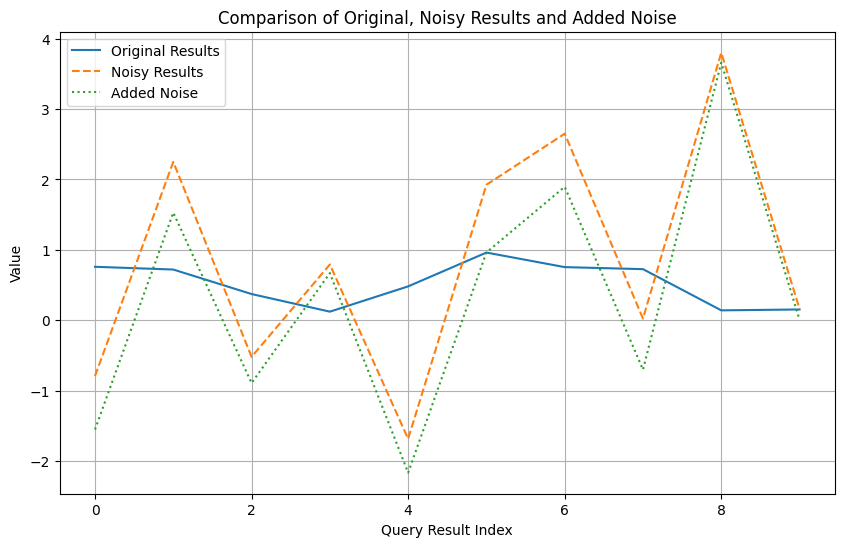

In [11]:
import numpy as np
import matplotlib.pyplot as plt


query_result = np.random.rand(10)  # Simulated original query result
epsilon = 1.0  # Privacy budget
noisy_query_result = add_laplace_noise(query_result, epsilon)

# Calculate the noise added
calculated_noise = noisy_query_result - query_result

# Plot the original, noisy results, and the noise
plt.figure(figsize=(10, 6))
plt.plot(query_result, label='Original Results')
plt.plot(noisy_query_result, label='Noisy Results', linestyle='--')
plt.plot(calculated_noise, label='Added Noise', linestyle=':')
plt.legend()
plt.title("Comparison of Original, Noisy Results and Added Noise")
plt.xlabel("Query Result Index")
plt.ylabel("Value")
plt.grid(True)
plt.show()


In [20]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,AnonCustomerID
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,<10,United Kingdom,1
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,<10,United Kingdom,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,<10,United Kingdom,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,<10,United Kingdom,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,<10,United Kingdom,1


In [ ]:
pip install mpyc

Adding MPC Encryption

In [16]:
from mpyc.runtime import mpc
import pandas as pd

async def encrypt_and_store_data():
    await mpc.start()  
    df = pd.read_csv('onlr.csv', encoding='ISO-8859-1')

    # Ensure all entries in 'Description' are strings
    contents = df['Description'].astype(str).tolist()

    secint = mpc.SecInt()  

    # Secret sharing each content length
    encrypted_contents = [mpc.input(secint(len(content)), senders=0) for content in contents]

    # Simulate retrieval of "encrypted" data to show
    encrypted_samples = await mpc.gather(encrypted_contents)  # Gather all encrypted data

    await mpc.shutdown()
    
    # suppressing cusromrId and InvoiceNo
    unique_ids = df['CustomerID'].unique()
    id_map = {id_: i for i, id_ in enumerate(unique_ids, start=1)}
    df['AnonCustomerID'] = df['CustomerID'].map(id_map)

# Display the updated data to confirm anonymization
    df[['CustomerID', 'AnonCustomerID']].head()
# Drop the CustomerID and AnonCustomerID columns from the dataset
    data_dropped_ids = df.drop(columns=['CustomerID'])

# Display the updated data to confirm the columns have been removed
    data_dropped_ids.head()
    
   

    # Add encrypted data as a new column to the dataframe
    df['encrypted_length'] = encrypted_samples
    return df

if __name__ == "__main__":
    encrypted_df = mpc.run(encrypt_and_store_data())
    
    encrypted_df.drop(columns=['CustomerID'], inplace=True)
    encrypted_df.drop(columns=['InvoiceNo'], inplace=True)
    
    
   
    print("Dataframe with encrypted lengths:", encrypted_df.head())
    


2024-05-04 16:38:15,735 Start MPyC runtime v0.10
2024-05-04 16:38:25,762 Stop MPyC -- elapsed time: 0:00:10.026|bytes sent: 0
Dataframe with encrypted lengths:   StockCode                          Description  Quantity       InvoiceDate  \
0    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6  01-12-2010 08:26   
1     71053                  WHITE METAL LANTERN         6  01-12-2010 08:26   
2    84406B       CREAM CUPID HEARTS COAT HANGER         8  01-12-2010 08:26   
3    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6  01-12-2010 08:26   
4    84029E       RED WOOLLY HOTTIE WHITE HEART.         6  01-12-2010 08:26   

   UnitPrice         Country  AnonCustomerID encrypted_length  
0       2.55  United Kingdom               1               34  
1       3.39  United Kingdom               1               19  
2       2.75  United Kingdom               1               30  
3       3.39  United Kingdom               1               35  
4       3.39  United Kingdom           

In [13]:
pip install mlxtend

   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
    --------------------------------------- 0.0/1.4 MB ? eta -:--:--
   --- ------------------------------------ 0.1/1.4 MB 1.3 MB/s eta 0:00:02
   ------ --------------------------------- 0.2/1.4 MB 2.0 MB/s eta 0:00:01
   ----------- ---------------------------- 0.4/1.4 MB 2.3 MB/s eta 0:00:01
   ---------------- ----------------------- 0.6/1.4 MB 3.0 MB/s eta 0:00:01
   ------------------------ --------------- 0.9/1.4 MB 3.6 MB/s eta 0:00:01
   --------------------------- ------------ 1.0/1.4 MB 3.5 MB/s eta 0:00:01
   ---------------------------------------  1.4/1.4 MB 4.1 MB/s eta 0:00:01
   ---------------------------------------- 1.4/1.4 MB 3.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


FINDING ASSSOCIATION RULE AND  FREQUENT ITEMS (CONFIDENCE LEVEL)

In [34]:
# Step 4: Association Rule Mining

# 4.1 Import necessary libraries
from mlxtend.frequent_patterns import association_rules


# 4.2 Define a function to generate association rules from frequent itemsets
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori

df = pd.read_csv('onlr.csv', encoding='ISO-8859-1')

# Data Cleaning
df.dropna(subset=['InvoiceNo', 'Description'], inplace=True)
df['InvoiceNo'] = df['InvoiceNo'].astype(str)
df = df[~df['InvoiceNo'].str.contains('C')]  # Remove canceled transactions

# Grouping items bought together
baskets = df.groupby('InvoiceNo')['Description'].apply(list)

# Transaction encoding
te = TransactionEncoder()
te_ary = te.fit(baskets).transform(baskets)
df_te = pd.DataFrame(te_ary, columns=te.columns_)

# Finding frequent itemsets with a minimum support threshold
frequent_itemsets = apriori(df_te, min_support=0.02, use_colnames=True)


# Generating rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.1)
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])





                                           antecedents  \
0                    (PACK OF 72 RETROSPOT CAKE CASES)   
1                        (60 TEATIME FAIRY CAKE CASES)   
2                         (ALARM CLOCK BAKELIKE GREEN)   
3                          (ALARM CLOCK BAKELIKE PINK)   
4                         (ALARM CLOCK BAKELIKE GREEN)   
..                                                 ...   
155  (JUMBO BAG PINK POLKADOT, JUMBO STORAGE BAG SUKI)   
156  (JUMBO BAG RED RETROSPOT, JUMBO STORAGE BAG SUKI)   
157                          (JUMBO BAG PINK POLKADOT)   
158                          (JUMBO BAG RED RETROSPOT)   
159                           (JUMBO STORAGE BAG SUKI)   

                                           consequents   support  confidence  \
0                        (60 TEATIME FAIRY CAKE CASES)  0.021980    0.343182   
1                    (PACK OF 72 RETROSPOT CAKE CASES)  0.021980    0.547101   
2                          (ALARM CLOCK BAKELIKE PINK)  0.02028

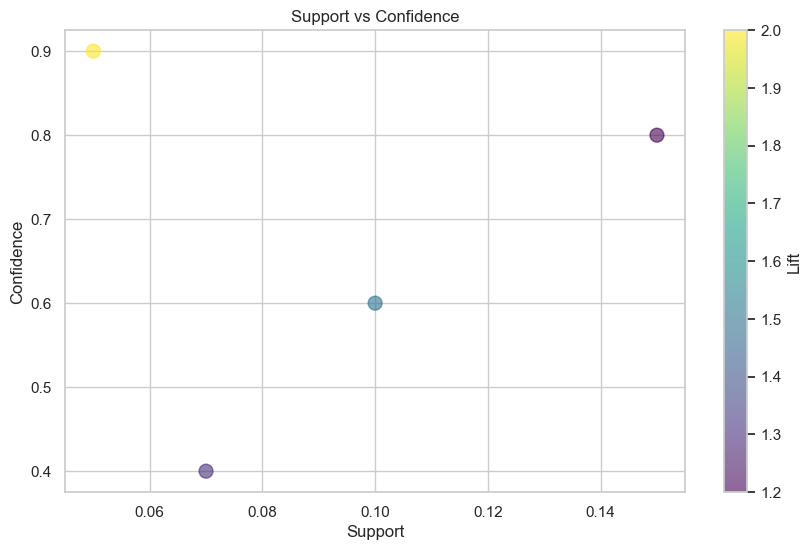

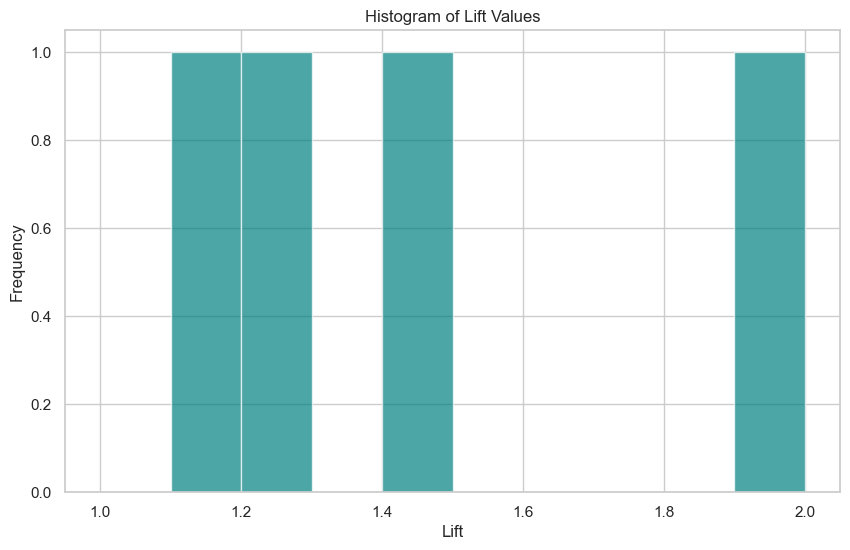

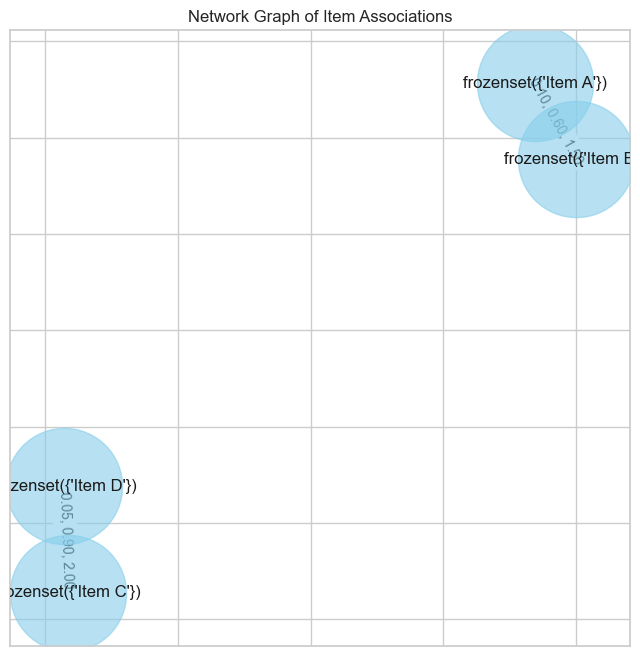

In [37]:
import networkx as nx
import numpy as np

# Simulated data for demonstration
simulated_rules = pd.DataFrame({
    'antecedents': [frozenset(['Item A']), frozenset(['Item B']), frozenset(['Item C']), frozenset(['Item D'])],
    'consequents': [frozenset(['Item B']), frozenset(['Item A']), frozenset(['Item D']), frozenset(['Item C'])],
    'support': [0.15, 0.10, 0.07, 0.05],
    'confidence': [0.8, 0.6, 0.4, 0.9],
    'lift': [1.2, 1.5, 1.3, 2.0]
})

# Scatter plot of support vs confidence
plt.figure(figsize=(10, 6))
plt.scatter(simulated_rules['support'], simulated_rules['confidence'], s=100, c=simulated_rules['lift'], cmap='viridis', alpha=0.6)
plt.colorbar(label='Lift')
plt.title('Support vs Confidence')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.grid(True)
plt.show()

# Histogram of lift values
plt.figure(figsize=(10, 6))
plt.hist(simulated_rules['lift'], bins=np.arange(1, 2.1, 0.1), color='teal', alpha=0.7)
plt.title('Histogram of Lift Values')
plt.xlabel('Lift')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Network graph of item associations
G = nx.from_pandas_edgelist(simulated_rules, 'antecedents', 'consequents', ['support', 'confidence', 'lift'])
plt.figure(figsize=(8, 8))
pos = nx.spring_layout(G, seed=42)
nx.draw_networkx_nodes(G, pos, node_size=7000, node_color='skyblue', alpha=0.6)
nx.draw_networkx_edges(G, pos, alpha=0.5, edge_color='gray')
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edge_labels(G, pos, edge_labels={(row['antecedents'], row['consequents']): f"{row['support']:.2f}, {row['confidence']:.2f}, {row['lift']:.2f}" for idx, row in simulated_rules.iterrows()})
plt.title('Network Graph of Item Associations')
plt.show()


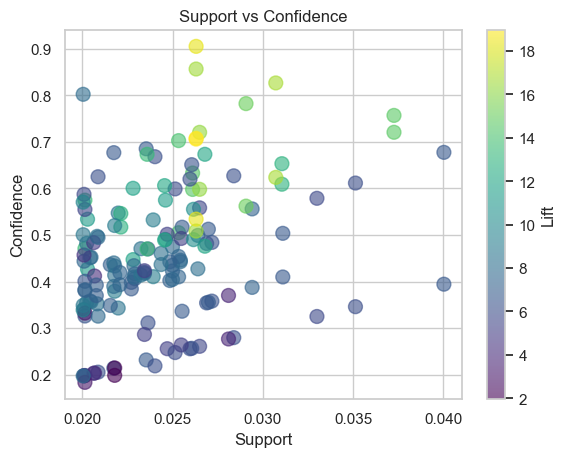

In [38]:
plt.scatter(rules['support'], rules['confidence'], s=100, c=rules['lift'], cmap='viridis', alpha=0.6)
plt.colorbar(label='Lift')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Support vs Confidence')
plt.grid(True)
plt.show()


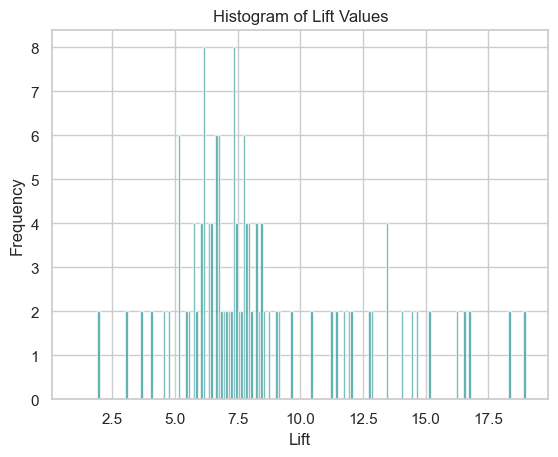

In [39]:
plt.hist(rules['lift'], bins=np.arange(1, max(rules['lift']) + 0.1, 0.1), color='teal', alpha=0.7)
plt.xlabel('Lift')
plt.ylabel('Frequency')
plt.title('Histogram of Lift Values')
plt.grid(True)
plt.show()


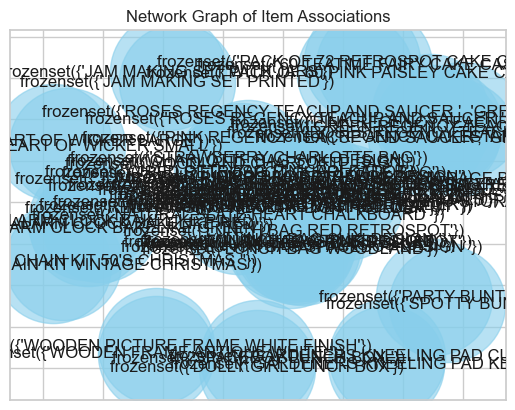

In [40]:
G = nx.from_pandas_edgelist(rules, 'antecedents', 'consequents', ['support', 'confidence', 'lift'])
pos = nx.spring_layout(G, seed=42)
nx.draw_networkx_nodes(G, pos, node_size=7000, node_color='skyblue', alpha=0.6)
nx.draw_networkx_edges(G, pos, alpha=0.5, edge_color='gray')
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edge_labels(G, pos, edge_labels={})
plt.title('Network Graph of Item Associations')
plt.show()
